# Module 3: Dimensionality reduction - Exercise

In this session you will compare both **feature selection** and **feature extraction** for dimensionality reduction, 
but we will still use **Naive Bayes** model.
We will apply these techniques to a real-world [HR Analytics dataset](https://www.kaggle.com/ludobenistant/hr-analytics).
##### NOTE

The goal is the get the best performance from the **Naive Bayes** model using feature reduction techniques. 
We can expect that a different model may be more suitable, 
however we want to only have a single moving part at a time so we will stay with Naive Bayes this week.

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import numpy as np
import pandas as pd
np.random.seed(18937)

# Add code below this comment
# to import additional libraries
# and classes
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA


# Load dataset

Load dataset into a DataFrame and shuffle.

In [28]:
# Dataset location
DATASET = '/dsa/data/all_datasets/HR_analytics.csv'
assert os.path.exists(DATASET)

# Add code below this comment
# ---------------------------
dataset=pd.read_csv(DATASET,sep=',').sample(frac=1).reset_index(drop=True)




Print top 5 rows of the dataset.

In [29]:
# Add code below this comment
# ---------------------------

dataset.iloc[:6]



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.85,0.90,5,202,3,0,0,0,IT,low
1,0.12,0.60,2,194,4,0,0,0,technical,medium
2,0.40,0.47,2,136,3,0,1,0,hr,medium
3,0.47,0.55,4,122,5,1,0,0,marketing,medium
4,0.89,0.65,5,195,6,0,1,0,support,low
5,0.80,0.83,4,183,2,1,0,1,support,low


## Processing

In the dataset, "sales" and "salary" are string columns,
which need some proccessing before we can start feature selection/extraction.

Play with following code and **add comments** to explain based on your understanding.
Feel free to drop questions on disscussion board if you encounter difficulties.

In [30]:
# Add line-by-line comments to explain following code
# ===============================
encoder = LabelBinarizer()# Creating an instance of the class LabelBinarizer called encoder.
salary_features = encoder.fit_transform(np.expand_dims(dataset.salary, 1))#the salary column is being encoded and expand
# transformed across axis 1.
for j, _class in enumerate(encoder.classes_):# for element and _class in the different classes formed after encoding
    # put a number on each element and display its class
    dataset.loc[:, 'salary_{}'.format(_class.replace('\x20', '_'))] = salary_features[:, j]#formating the newly created
    #classes to have salary_ plus the salary_features j.

dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_high,salary_low,salary_medium
0,0.85,0.90,5,202,3,0,0,0,IT,low,0,1,0
1,0.12,0.60,2,194,4,0,0,0,technical,medium,0,0,1
2,0.40,0.47,2,136,3,0,1,0,hr,medium,0,0,1
3,0.47,0.55,4,122,5,1,0,0,marketing,medium,0,0,1
4,0.89,0.65,5,195,6,0,1,0,support,low,0,1,0


Now please write similar code for "sales" column like what we just did above. Feel free to drop questions on disscussion board if you need clarification.

In [31]:
# Add code below this comment
# ---------------------------
encoder = LabelBinarizer()
sales_features = encoder.fit_transform(np.expand_dims(dataset.sales,1))
for j,_class in enumerate(encoder.classes_):
    dataset.loc[:, 'sales_{}'.format(_class.replace('\x20', '_'))] = sales_features[:, j]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 23 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
salary_high              14999 non-null int64
salary_low               14999 non-null int64
salary_medium            14999 non-null int64
sales_IT                 14999 non-null int64
sales_RandD              14999 non-null int64
sales_accounting         14999 non-null int64
sales_hr                 14999 non-null int64
sales_management         14999 non-null int64
sales_marketing          14999 non-null int64
sales_produ

In [32]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.85,0.90,5,202,3,0,0,0,IT,low,...,1,0,0,0,0,0,0,0,0,0
1,0.12,0.60,2,194,4,0,0,0,technical,medium,...,0,0,0,0,0,0,0,0,0,1
2,0.40,0.47,2,136,3,0,1,0,hr,medium,...,0,0,0,1,0,0,0,0,0,0
3,0.47,0.55,4,122,5,1,0,0,marketing,medium,...,0,0,0,0,0,1,0,0,0,0
4,0.89,0.65,5,195,6,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0


Store feature columns (all columns except 'left', 'sales' and 'salary') to a new variable **X**.

Store label column into a new variable **y**.

In [36]:
# Add code below this comment
# ---------------------------
X = np.array(dataset.iloc[:,[0,1,2,3,4,7,10,11,12,13,14,15,16,17,18,19,20,21,22]])
y = np.array(dataset.left)


#dataset.head()


Create train/validate split (20% validation ratio) and use variable names: **X_train, X_test, y_train, y_test**.

In [37]:
# Add code below this comment
# ---------------------------
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)





# Feature selection and evaluation

In this section you could make use of any method so far introduced or provided by sklearn for **feature selection**.

Steps:
1. Initialize a feature selector
2. Fit feature selector on training set
3. Print indices of features selected, the "support".
4. Train a Gaussian Naive Bayes model on selected features from training set.
5. Evaluate the model by measuring its accuracy on the test set.

Please **briefly answer the 2 questions** at the end of this section; use evidence printed from your code as appropiate to support your answer. 

It is not required but if you are comparing different feature selection methods,
please add new notebook cells for each method.

In [57]:
# Add code below this comment
# ---------------------------
selector = SelectKBest(chi2,k=6)
selector.fit(X_train,y_train)
print('X statistic',selector.scores_)
print('Selected indices',selector.get_support(True))
model=GaussianNB()
model.fit(selector.transform(X_train),y_train)
model.score(selector.transform(X_test),y_test)




X statistic [  1.81535117e+02   4.48445122e-02   3.72329462e+00   7.94896891e+02
   1.56525975e+02   4.78547228e+01   1.61801609e+02   1.21291796e+02
   3.75952950e+01   6.37107974e-01   2.80140334e+01   4.04950887e+00
   1.07948130e+01   2.27176338e+01   6.14596997e-02   2.89620782e+00
   4.43749081e-02   1.58555395e+00   5.10618897e+00]
Selected indices [0 3 4 5 6 7]


0.72199999999999998

Briefly justify why you think this feature selector is suitable for the job.

How many number of features did you finally choose? Why?

# Feature extraction

In this section you could use **Principle Component Analysis** or **Factor Analysis** for feature extraction.

Steps:
1. Initialize either PCA or FactorAnalysis
2. Fit feature extractor on training set.
4. Train a Gaussian Naive Bayes model on selected features from training set.
5. Evaluate the model by measuring its accuracy on the test set.

In [55]:
# Add code below this comment
# ---------------------------
pca = PCA(n_components=10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
X_features = pca.transform(X_train)
model = GaussianNB()
model.fit(X_features,y_train)
model.score(pca.transform(X_test),y_test)




[  9.98039631e-01   8.74050890e-04   4.79005190e-04   1.82858975e-04
   9.49303365e-05   6.57021204e-05   4.75947140e-05   4.32745546e-05
   2.96746143e-05   2.44962996e-05]


0.82233333333333336

Create a scree plot of **explained variance ratio** for extracted features.

total explained variance ratio 0.999881218518


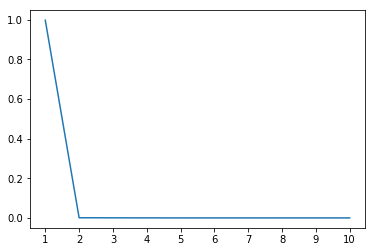

In [61]:
# Add code below this comment
# ---------------------------
x_ticks = np.arange(len(pca.components_)) + 1
plt.xticks(x_ticks)
plt.plot(x_ticks,pca.explained_variance_ratio_)
print('total explained variance ratio',np.sum(pca.explained_variance_ratio_))


Do you think this feature extraction method performed satisfactorily?
How does it compare to feature selection methods in terms of effectiveness?

How would you explain the features you have extracted to somebody without a data science background if you were to recommend this method?
(short answer)

# Save your notebook!